# Importing Libraries and Data and Renaming Columns

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# Import dataset
path = r'C:\Users\navya\Achievement 6'
df_r_est = pd.read_csv(os.path.join(path, '02 Data', 'Raw Data', 'real_estate_ex6_2.csv'))

In [3]:
# ensure graphs display in notebook
%matplotlib inline

In [4]:
df_r_est.shape

(414, 8)

In [5]:
df_r_est.head(2)

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2

In [6]:
df_r_est.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

# Elbow Technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [9]:
score = [kmeans[i].fit(df_r_est).score(df_r_est) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option
score

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-663923028.4639182,
 -187053609.80588207,
 -61014500.644654214,
 -42896606.653960645,
 -27765250.59413057,
 -20770104.538674258,
 -16875771.127628937,
 -14074681.647149377,
 -12251853.792370599]

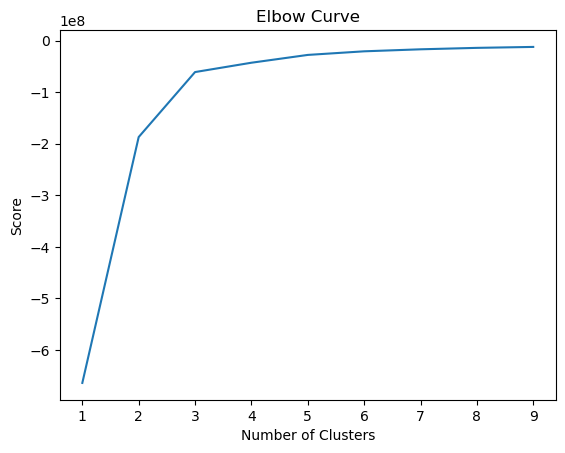

In [10]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

# k-means Clustering

In [12]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [13]:
# Fit the k-means object to the data
kmeans.fit(df_r_est)

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
df_r_est['clusters'] = kmeans.fit_predict(df_r_est)

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [16]:
df_r_est.head()

No      Date  House age   D. metro  N. shops  Latitude  Longitude  \
0   1  2012.917       32.0   84.87882        10  24.98298  121.54024   
1   2  2012.917       19.5  306.59470         9  24.98034  121.53951   
2   3  2013.583       13.3  561.98450         5  24.98746  121.54391   
3   4  2013.500       13.3  561.98450         5  24.98746  121.54391   
4   5  2012.833        5.0  390.56840         5  24.97937  121.54245   

   Price per unit  clusters  
0            37.9         1  
1            42.2         1  
2            47.3         1  
3            54.8         1  
4            43.1         1

In [18]:
df_r_est['clusters'].value_counts()

clusters
1    280
0     93
2     41
Name: count, dtype: int64

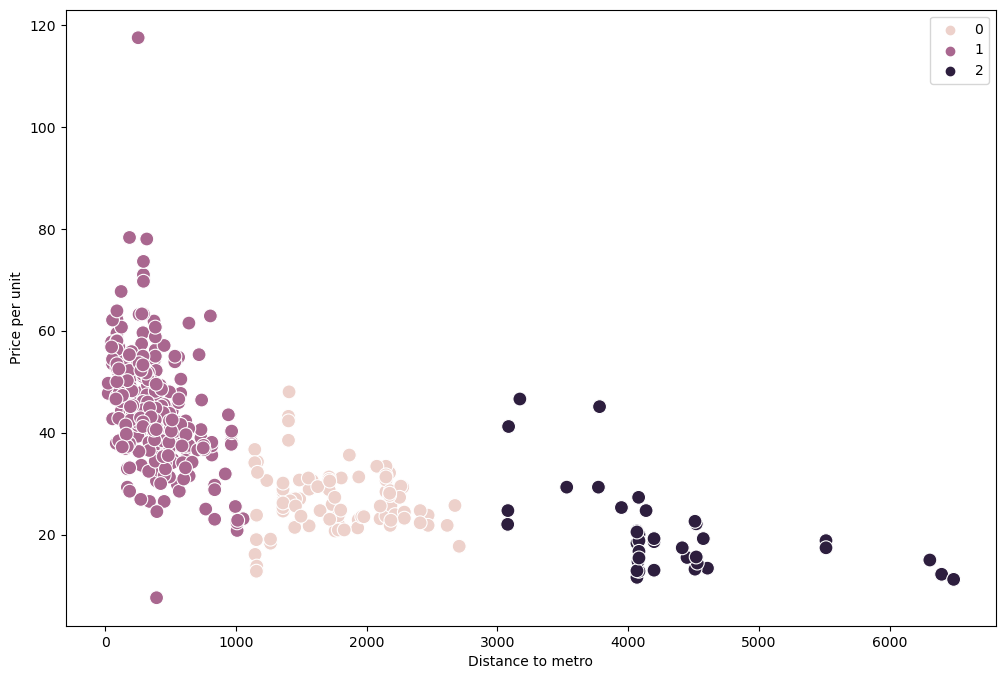

In [19]:
# Plot the clusters for the \"Price per Unit\" and \"D.metro\" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_r_est['D. metro'], y=df_r_est['Price per unit'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `x` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot
ax.grid(False) # This removes the grid from the background
plt.xlabel('Distance to metro') # Label x-axis
plt.ylabel('Price per unit') # Label y-axis
plt.show()

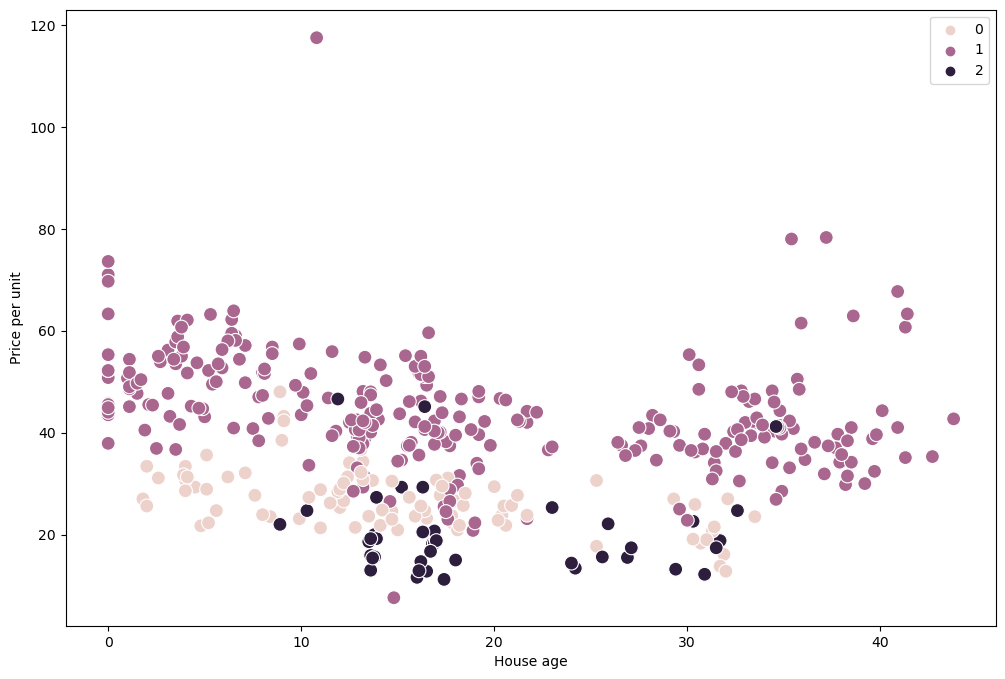

In [21]:
# Plot the clusters for the \"House Age\" and \"Price per Unit\" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_r_est['House age'], y=df_r_est['Price per unit'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('House age') 
plt.ylabel('Price per unit') 
plt.show()

In [26]:
df_r_est.loc[df_r_est['clusters'] == 2, 'cluster'] = 'purple'
df_r_est.loc[df_r_est['clusters'] == 1, 'cluster'] = 'dark purple'
df_r_est.loc[df_r_est['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
df_r_est.groupby('cluster').agg({'N. shops':['mean', 'median'],
                         'House age':['mean', 'median'],
                         'D. metro':['mean', 'median'],
                          'Price per unit':['mean', 'median']})

N. shops         House age            D. metro             \
                 mean median       mean median         mean     median   
cluster                                                                  
dark purple  5.325000    5.0  18.270714   16.2   386.302676   373.6163   
pink         2.096774    2.0  15.229032   14.2  1767.950398  1735.5950   
purple       0.219512    0.0  19.534146   16.7  4296.208268  4082.0150   

            Price per unit         
                      mean median  
cluster                            
dark purple      44.334643   42.5  
pink             26.706452   26.5  
purple           20.156098   18.3